In [ ]:
display(Markdown("## 1. Sales Overview"))
display(Markdown("Understand the overall sales performance, trends, and patterns over time."))

display(Markdown(f"**Total Revenue:** ₹{total_revenue:,.2f}"))
display(Markdown(f"**Total Orders:** {total_orders}"))
display(Markdown(f"**Average Order Value (AOV):** ₹{average_order_value:,.2f}"))

display(Markdown("### Monthly Revenue Trend"))
display(monthly_trend)


## 1. Sales Overview

Understand the overall sales performance, trends, and patterns over time.

**Total Revenue:** ₹78,590,170.25

**Total Orders:** 120229

**Average Order Value (AOV):** ₹653.67

### Monthly Revenue Trend

,Month,Revenue
0,2022-03,101683.85
1,2022-04,28836200.27
2,2022-05,26226476.75
3,2022-06,23425809.38


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving AmazonSaleReport.csv to AmazonSaleReport.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['AmazonSaleReport.csv']))

print("✅ File uploaded successfully!")
print("Shape:", df.shape)
df.head()

✅ File uploaded successfully!
Shape: (128976, 21)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by', 'new', 'pendings'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   order_id            128976 non-null  object 
 2   date                128976 non-null  object 
 3   status              128976 non-null  object 
 4   fulfilment          128976 non-null  object 
 5   sales_channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   category            128976 non-null  object 
 8   size                128976 non-null  object 
 9   courier_status      128976 non-null  object 
 10  qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
df.head()

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,...,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b,fulfilled-by,new,pendings
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], errors='coerce')
missing_dates = df[df['date'].isna()]
print("Rows with invalid dates:", missing_dates.shape[0])

Rows with invalid dates: 0


/tmp/ipython-input-1567046792.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
total_revenue = df['amount'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 78590170.24999997


In [ ]:
from IPython.display import Markdown, display

display(Markdown(f"**Total Revenue:** ₹{total_revenue:,.2f}"))

**Total Revenue:** ₹78,590,170.25

In [ ]:
total_orders = df['order_id'].nunique()
print("Total Orders:", total_orders)

Total Orders: 120229


In [ ]:
average_order_value = total_revenue / total_orders
print("Average Order Value:", round(average_order_value, 2))


Average Order Value: 653.67


In [ ]:
display(Markdown(f"**Total Orders:** {total_orders}"))
display(Markdown(f"**Average Order Value (AOV):** ₹{average_order_value:,.2f}"))

**Total Orders:** 120229

**Average Order Value (AOV):** ₹653.67

/tmp/ipython-input-2071912810.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Revenue', data=monthly_trend, palette='Blues_d')


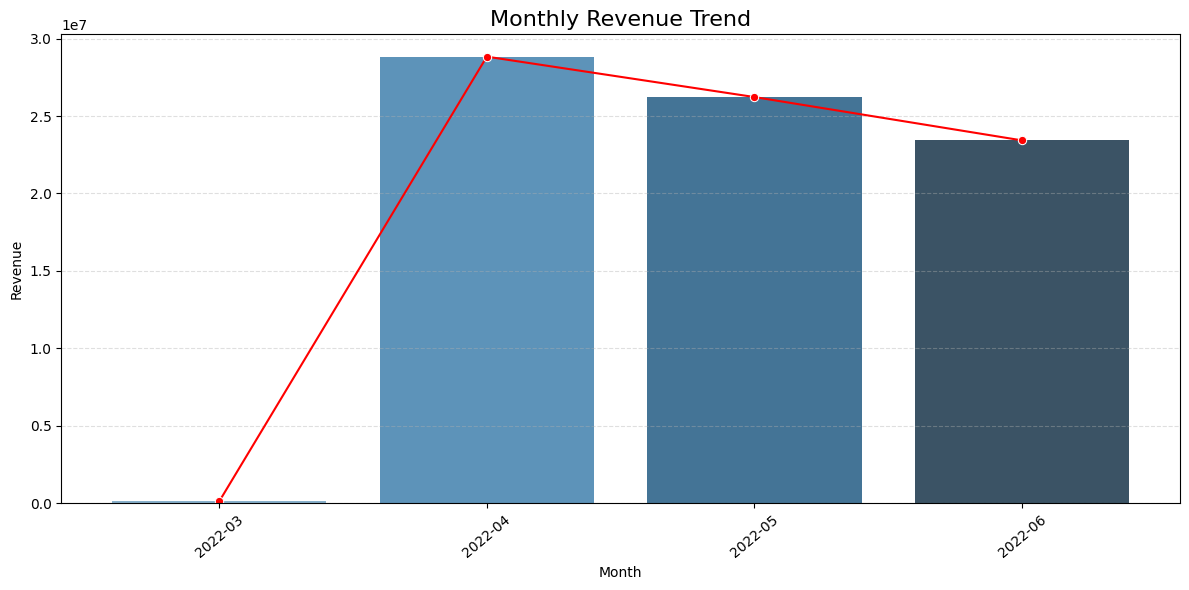

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


monthly_trend['Month'] = monthly_trend['Month'].astype(str)

plt.figure(figsize=(12,6))


sns.barplot(x='Month', y='Revenue', data=monthly_trend, palette='Blues_d')


sns.lineplot(x='Month', y='Revenue', data=monthly_trend, marker='o', color='red')

plt.xticks(rotation=40)
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Revenue', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [24]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
display(Markdown("## 2.Product Analysis Summary"))
display(Markdown("""
The goal of this analysis was to explore product performance across categories, sizes, and their combinations.

- The **top-performing categories** by revenue highlight which products generate the most profit.
- The **most common product sizes** reflect customer preferences and demand patterns.
- The **category-size combination analysis** identifies popular product variants, helping inform inventory and marketing decisions.

Overall, these insights provide a clear picture of which products and sizes are driving sales, enabling data-driven decisions for stocking and promotions.
"""))


## 2.Product Analysis Summary


The goal of this analysis was to explore product performance across categories, sizes, and their combinations.  

- The **top-performing categories** by revenue highlight which products generate the most profit.  
- The **most common product sizes** reflect customer preferences and demand patterns.  
- The **category-size combination analysis** identifies popular product variants, helping inform inventory and marketing decisions.  

Overall, these insights provide a clear picture of which products and sizes are driving sales, enabling data-driven decisions for stocking and promotions.


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving AmazonSaleReport.csv to AmazonSaleReport.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['AmazonSaleReport.csv']))

print("✅ File uploaded successfully!")
print("Shape:", df.shape)

✅ File uploaded successfully!
Shape: (128976, 21)


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by', 'new', 'pendings'],
      dtype='object')

In [ ]:
category_revenue = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()

display(Markdown("### Top Categories by Revenue"))
display(category_revenue.head(10))

### Top Categories by Revenue

,category,amount
0,T-shirt,39206756.65
1,Shirt,21297770.08
2,Blazzer,11215104.12
3,Trousers,5346286.30
4,Perfume,789419.66
5,Wallet,458408.18
6,Socks,150757.50
7,Shoes,124752.76
8,Watch,915.00


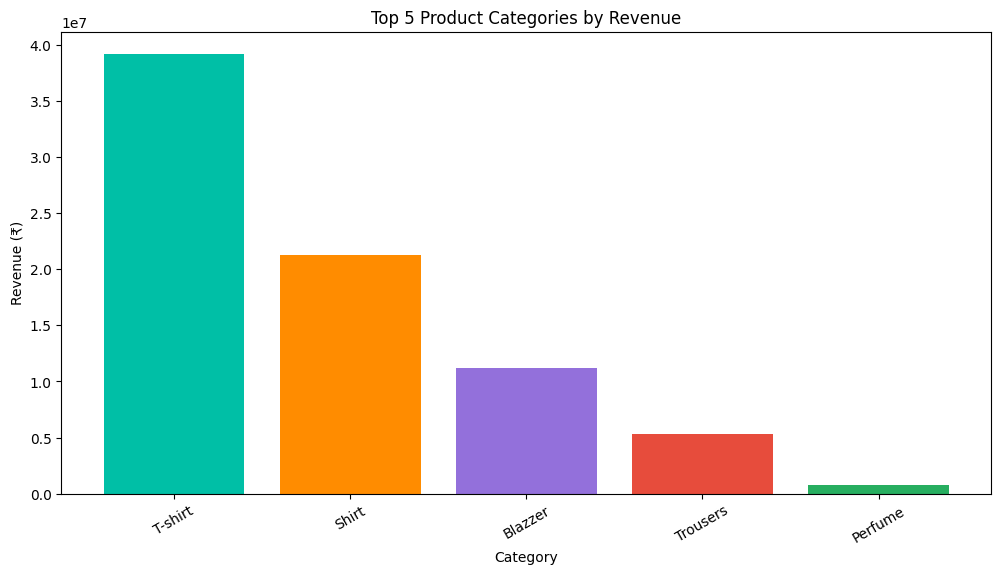

In [ ]:
plt.figure(figsize=(12,6))

colors = ['#00BFA6', '#FF8C00', '#9370DB', '#E74C3C', '#27AE60']
plt.bar(category_revenue['category'][:5],
        category_revenue['amount'][:5],
        color=colors)
plt.title('Top 5 Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=30)
plt.show()



In [ ]:
if 'size' in df.columns:
    size_distribution = df['size'].value_counts().reset_index()
    size_distribution.columns = ['Size', 'Count']
    display(Markdown("### Product Size Distribution"))
    display(size_distribution.head(10))


### Product Size Distribution

,Size,Count
0,M,22373
1,L,21807
2,XL,20549
3,XXL,17806
4,S,16776
5,3XL,14643
6,XS,11056
7,Free,2251
8,6XL,738
9,5XL,550


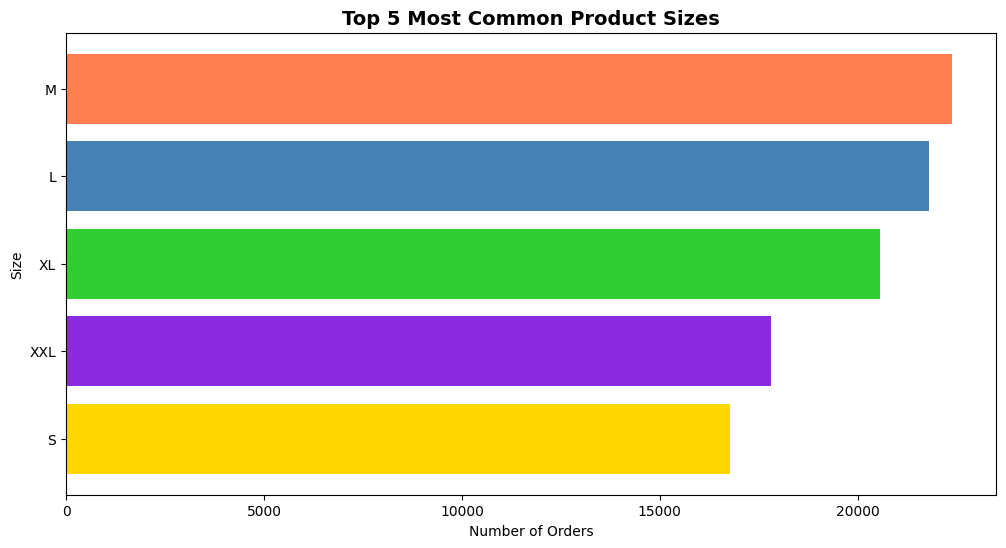

In [ ]:
plt.figure(figsize=(12,6))
plt.barh(size_distribution['Size'][:5],
         size_distribution['Count'][:5],
         color=['#FF7F50','#4682B4','#32CD32','#8A2BE2','#FFD700'])
plt.title('Top 5 Most Common Product Sizes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Size')
plt.gca().invert_yaxis()

plt.show()


In [ ]:
popular_combo = df.groupby(['category', 'size']).size().reset_index(name='Count').sort_values('Count', ascending=False)
display(Markdown("### Most Popular Category-Size Combinations"))
display(popular_combo.head(10))

### Most Popular Category-Size Combinations

,category,size,Count
31,T-shirt,M,9351
12,Shirt,L,8924
15,Shirt,XL,8669
13,Shirt,M,8555
30,T-shirt,L,8192
17,Shirt,XXL,7652
33,T-shirt,XL,7573
32,T-shirt,S,7509
35,T-shirt,XXL,6166
26,T-shirt,3XL,5796


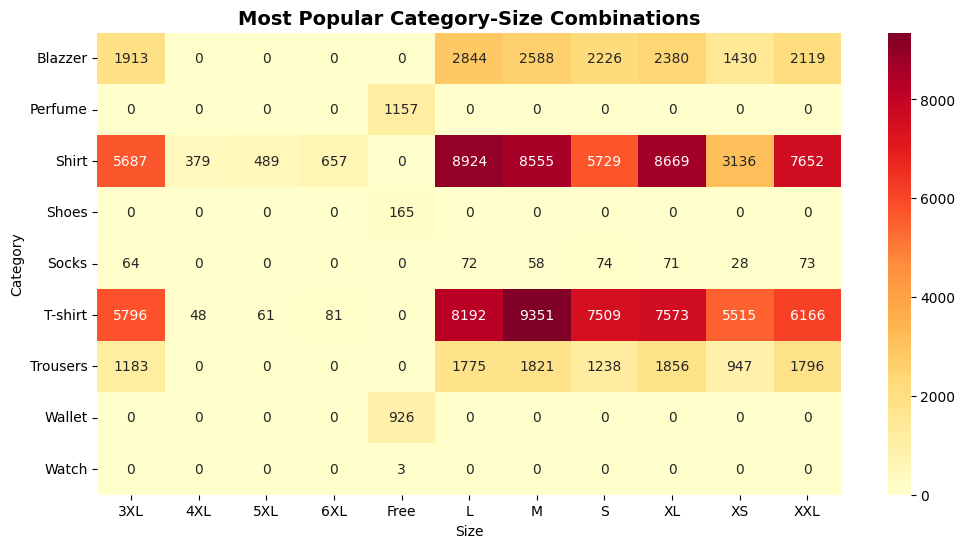

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combo_pivot = popular_combo.pivot(index='category', columns='size', values='Count').fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(combo_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Most Popular Category-Size Combinations', fontsize=14, fontweight='bold')
plt.xlabel('Size')
plt.ylabel('Category')
plt.show()


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AmazonSaleReport.csv to AmazonSaleReport.csv


In [5]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['AmazonSaleReport.csv']))

print("✅ File uploaded successfully!")
print("Shape:", df.shape)

✅ File uploaded successfully!
Shape: (128976, 21)


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
category_revenue = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()
display(Markdown("### Top Categories by Revenue"))
display(category_revenue.head(10))
category_revenue['amount'] = category_revenue['amount'].round(2)

### Top Categories by Revenue

,category,amount
0,T-shirt,39206756.65
1,Shirt,21297770.08
2,Blazzer,11215104.12
3,Trousers,5346286.30
4,Perfume,789419.66
5,Wallet,458408.18
6,Socks,150757.50
7,Shoes,124752.76
8,Watch,915.00


In [14]:
%config InteractiveShell.display_data_priority = {'text/plain': 1, 'application/vnd.google.colaboratory.inferred_output': 0}

size_distribution = df['size'].value_counts().reset_index()
size_distribution.columns = ['Size', 'Count']
display(Markdown("### Most Common Product Sizes"))
display(size_distribution.head(10))

### Most Common Product Sizes

,Size,Count
0,M,22373
1,L,21807
2,XL,20549
3,XXL,17806
4,S,16776
5,3XL,14643
6,XS,11056
7,Free,2251
8,6XL,738
9,5XL,550


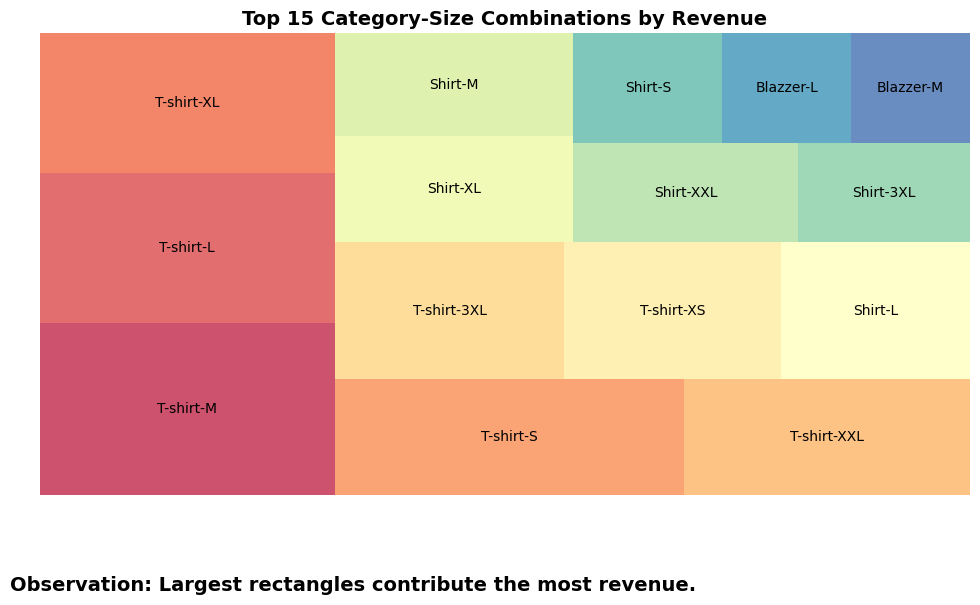

In [22]:
!pip install squarify

import squarify
import seaborn as sns
plt.figure(figsize=(12,6))

top_combo = df.groupby(['category','size'])['amount'].sum().sort_values(ascending=False).head(15).reset_index()
squarify.plot(
    sizes=top_combo['amount'],
    label=top_combo['category'] + '-' + top_combo['size'],
    color=sns.color_palette("Spectral", 15),
    alpha=0.8
)
plt.axis('off')
plt.title("Top 15 Category-Size Combinations by Revenue", fontsize=14, fontweight='bold')


plt.figtext(0.1, -0.05, "Observation: Largest rectangles contribute the most revenue.", wrap=True, fontsize=14,  fontweight='bold')

plt.show()


In [25]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt


display(Markdown("## 3. Fulfillment Analysis"))
display(Markdown("Investigate the fulfillment methods used and their effectiveness in delivering orders."))

## 3. Fulfillment Analysis

Investigate the fulfillment methods used and their effectiveness in delivering orders.

In [50]:
display(Markdown("### Fulfillment Analysis Summary"))
display(Markdown("""
This analysis investigates the fulfillment methods used to deliver orders.

- **Order count by fulfillment method** shows which method handles the most volume.
- **Success rate (%)** indicates effectiveness in delivering orders on time.
- Methods with **higher success rates** are more reliable and efficient.
- This insight can guide operational improvements and fulfillment strategy decisions.
"""))

### Fulfillment Analysis Summary


This analysis investigates the fulfillment methods used to deliver orders.  

- **Order count by fulfillment method** shows which method handles the most volume.  
- **Success rate (%)** indicates effectiveness in delivering orders on time.  
- Methods with **higher success rates** are more reliable and efficient.  
- This insight can guide operational improvements and fulfillment strategy decisions.


In [26]:
fulfillment_counts = df['fulfilment'].value_counts().reset_index()
fulfillment_counts.columns = ['Fulfillment Method', 'Number of Orders']
display(Markdown("### Orders by Fulfillment Method"))
display(fulfillment_counts)


### Orders by Fulfillment Method

,Fulfillment Method,Number of Orders
0,Amazon,89713
1,Merchant,39263


### Orders by Fulfillment Method

,Fulfillment Method,Number of Orders
0,Amazon,89713
1,Merchant,39263


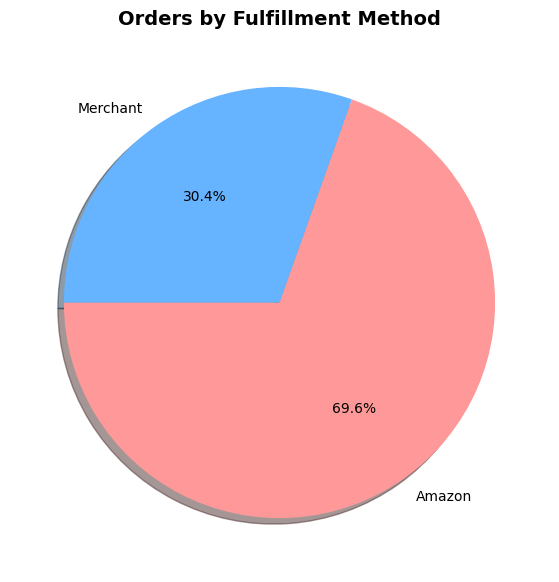

In [32]:
display(Markdown("### Orders by Fulfillment Method"))
display(fulfillment_counts)

plt.figure(figsize=(12,7))
colors = ['#FF9999','#66B3FF','#99FF99','#FFD700']

plt.pie(
    fulfillment_counts['Number of Orders'],
    labels=fulfillment_counts['Fulfillment Method'],
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    shadow=True
)
plt.title("Orders by Fulfillment Method", fontsize=14, fontweight='bold')
plt.show()

In [37]:
df['success'] = df['status'].str.contains('Shipped|Delivered', case=False, na=False)
fulfillment_effectiveness = df.groupby('fulfilment')['success'].mean().reset_index()
fulfillment_effectiveness['success_rate_%'] = (fulfillment_effectiveness['success']*100).round(2)

display(Markdown("### Fulfillment Effectiveness (Success Rate %)"))
display(fulfillment_effectiveness[['fulfilment', 'success_rate_%']])


### Fulfillment Effectiveness (Success Rate %)

,fulfilment,success_rate_%
0,Amazon,86.74
1,Merchant,81.20


### Fulfillment Effectiveness (Success Rate %)

,fulfilment,success_rate_%
0,Amazon,86.74
1,Merchant,81.20


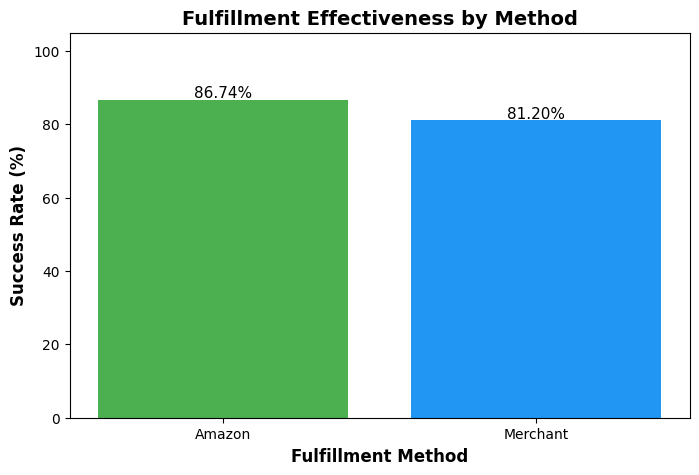

In [42]:
display(Markdown("### Fulfillment Effectiveness (Success Rate %)"))
display(fulfillment_effectiveness[['fulfilment', 'success_rate_%']])


plt.figure(figsize=(8,5))
bars = plt.bar(
    fulfillment_effectiveness['fulfilment'],
    fulfillment_effectiveness['success_rate_%'],
    color=['#4CAF50', '#2196F3', '#FF9800']

)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=11)

plt.title("Fulfillment Effectiveness by Method", fontsize=14, fontweight='bold')
plt.xlabel("Fulfillment Method", fontsize=12, fontweight='bold')
plt.ylabel("Success Rate (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 105)

plt.show()

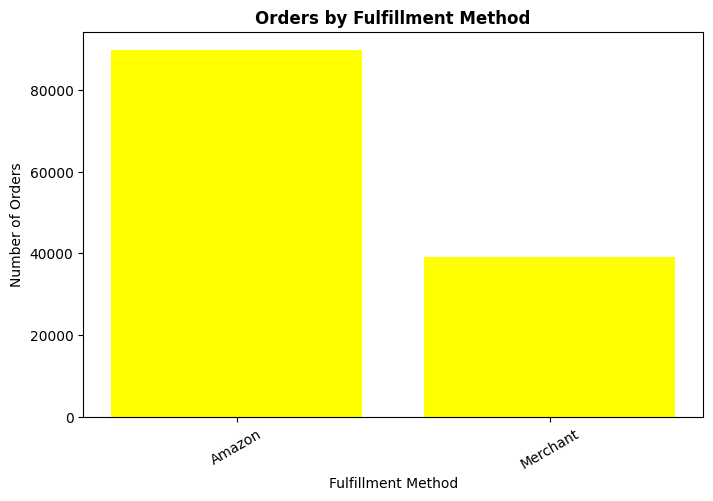

In [47]:
plt.figure(figsize=(8,5))
plt.bar(fulfillment_counts['Fulfillment Method'], fulfillment_counts['Number of Orders'], color='yellow')
plt.title("Orders by Fulfillment Method" ,fontweight='bold')
plt.xlabel("Fulfillment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)

plt.show()

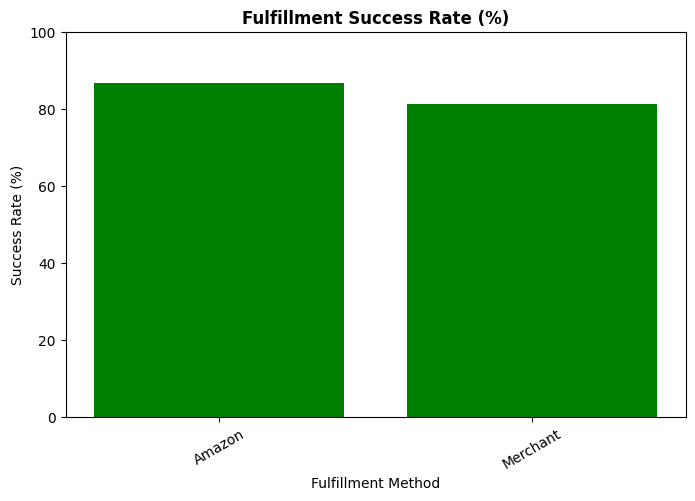

In [49]:
plt.figure(figsize=(8,5))
plt.bar(fulfillment_effectiveness['fulfilment'], fulfillment_effectiveness['success_rate_%'], color='green')
plt.title("Fulfillment Success Rate (%)", fontweight = 'bold')
plt.xlabel("Fulfillment Method")
plt.ylabel("Success Rate (%)")
plt.ylim(0,100)
plt.xticks(rotation=30)

plt.show()